In [1]:
!pip install opencv-python

In [2]:
!sudo apt-get install -y libgl1-mesa-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev
  libglx-dev libopengl-dev
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev
  libglvnd-dev libglx-dev libopengl-dev
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 221 kB of archives.
After this operation, 2,577 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libegl-dev amd64 1.4.0-1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgles1 amd64 1.4.0-1 [11.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 li

In [3]:
!pip install install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input

# 최소 딥러닝 코드

## 데이터 준비

y = x*x 그래프의 x,y 데이터

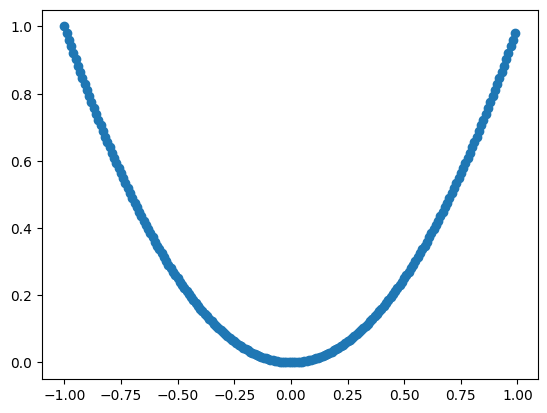

In [5]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x*x

plt.scatter(x,y)

In [6]:
print(x[:5])
print(y[:5])

[-1.   -0.99 -0.98 -0.97 -0.96]
[1.     0.9801 0.9604 0.9409 0.9216]


7/7 [==============================] - 0s 4ms/step


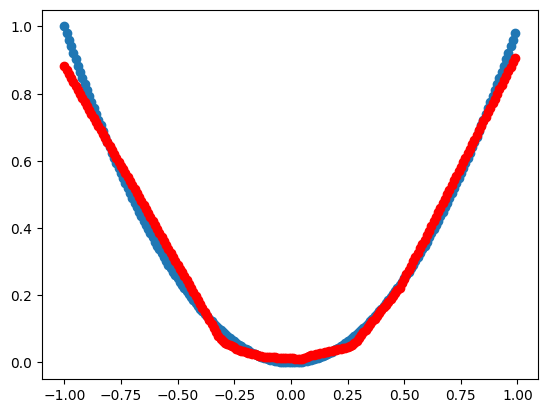

In [7]:
# 모델 정의
model = Sequential()
model.add(Input((1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))


# 학습 위한 설정 : 모델 + optimizer + loss
model.compile(optimizer="Adam", loss="MSE")


# 학습
model.fit(x, y, epochs=100, verbose=0)


# 예측
y_ = model.predict(x)


# 결과를 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# 회귀 작업

회귀(regression) 작업 : 어떤 숫자를 예측하는 작업. 예를 들면, 몸무게를 예측

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target


In [9]:
print(len(x))
print(x[0])

442
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [10]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [11]:
print(len(y))
print(y[:5])

442
[151.  75. 141. 206. 135.]


In [12]:
y = (y - y.min()) / (y.max() - y.min())
print(y[:5])

[0.39252336 0.15576324 0.36137072 0.56386293 0.34267913]


In [13]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

전체 데이터를 8:2로 학습 데이터와, 학습 이후의 검증 데이터로 나눈다.

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:

# 모델 정의
model = Sequential()
model.add(Input((10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer="Adam", loss="MSE")

# 모델 학습
model.fit(train_x,train_y, epochs=200, validation_data=(test_x, test_y))

Epoch 1/200
12/12 [==============================] - 3s 38ms/step - loss: 0.0679 - val_loss: 0.0623
Epoch 2/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0632 - val_loss: 0.0570
Epoch 3/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0590 - val_loss: 0.0527
Epoch 4/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0545 - val_loss: 0.0470
Epoch 5/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0493 - val_loss: 0.0412
Epoch 6/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0448 - val_loss: 0.0372
Epoch 7/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0409 - val_loss: 0.0338
Epoch 8/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0376 - val_loss: 0.0316
Epoch 9/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0353 - val_loss: 0.0303
Epoch 10/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0340 - val_loss: 0.0299

In [16]:

# 모델 평가
loss = model.evaluate(test_x, test_y)
print('Test MSE:', loss)

# 예측
pred_y = model.predict(test_x)
pred_y = pred_y.flatten()

3/3 [==============================] - 0s 4ms/step - loss: 0.0241
Test MSE: 0.024063371121883392
3/3 [==============================] - 0s 3ms/step


In [17]:
print(test_y[:5])
print(pred_y[:5])

[0.60436137 0.14018692 0.55140187 0.63862928 0.26791277]
[0.32793248 0.439634   0.39582857 0.80013806 0.25495708]


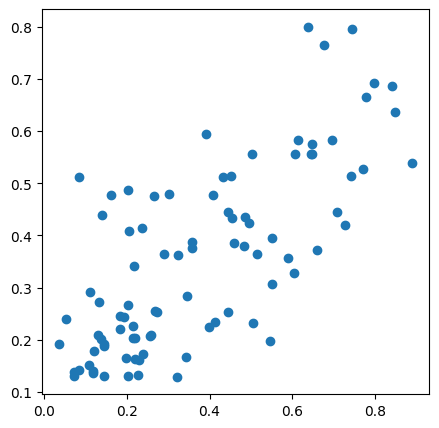

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(test_y, pred_y)
plt.show()

딥러닝의 역할

입력값들로 출력값 자체를 예측한다.

```
['age', 'sex', 'bmi', 'bp',  's1',  's2',   's3',  's4',   's5', 's6'  ] -> 당뇨병 수치
[ 0.038  0.050  0.061  0.021 -0.044  -0.034 -0.043 -0.002  0.019 -0.017] -> 0.356
```

# 분류 작업

분류 작업(classification) : 입력을 특정 카테고리로 예측하는 작업. 보통 카테고리는 0, 1, 2, ... 의 숫자로 표현된다.

In [19]:
!wget https://raw.githubusercontent.com/RowanCompany/2024_AI_workshop/main/material/data/iris.csv -O iris.csv

--2024-06-28 20:23:33--  https://raw.githubusercontent.com/RowanCompany/2024_AI_workshop/main/material/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.17K  --.-KB/s    in 0s      

2024-06-28 20:23:34 (32.4 MB/s) - ‘iris.csv’ saved [2218/2218]



In [20]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [21]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [22]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [23]:
print(x[:5])
print(y[:5])

[[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]]
[[2.]
 [1.]
 [2.]
 [0.]
 [0.]]


In [24]:
model = keras.Sequential()
model.add(Input((4,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=100)


Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.4136 - accuracy: 0.1500
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3724 - accuracy: 0.0100
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.3292 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2922 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2567 - accuracy: 0.0300
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2238 - accuracy: 0.0900
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1945 - accuracy: 0.1900
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1672 - accuracy: 0.3100
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1423 - accuracy: 0.3600
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1206 - accuracy: 0.3600
Epoch 11/100
4/4 [===

In [25]:
loss, acc = model.evaluate(test_x, test_y)
print("accuracy=", acc)


1/1 [==============================] - 0s 150ms/step - loss: 0.2397 - accuracy: 1.0000
accuracy= 1.0


딥러닝의 역할

입력값들로 출력값(카테고리)를 예측한다.

```
['sepal length', 'seppal width', 'petal length', 'petal width'  ] -> 붓꽃 품종
[6.4             2.8             5.6             2.2]             -> 0(Setosa)
```

# 이미지의 이해

In [26]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


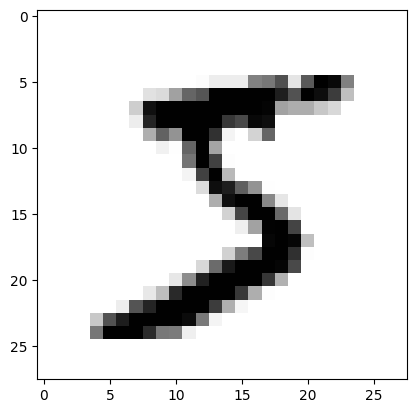

In [27]:
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

In [28]:
np.set_printoptions(linewidth=4*29)
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

5


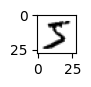

In [29]:
plt.figure(figsize=(0.5, 0.5))
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

# 흑백 이미지 분류

입력 : 0-9의 10개 숫자의 흑백영상에 해당하는 가로 28, 세로 28의 2차원 행렬 숫자

출력 : 0~9의 10개 카테고리 인덱스

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255.
test_x = test_x/255.


model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=5)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6303 - accuracy: 0.8093
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - accuracy: 0.9072
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2848 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2613 - accuracy: 0.9258
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2445 - accuracy: 0.9284
loss= 0.24453520774841309
acc= 0.9283999800682068
313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


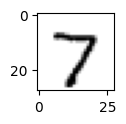

predicted as 7


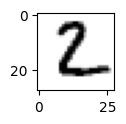

predicted as 2


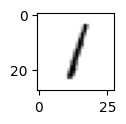

predicted as 1


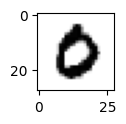

predicted as 0


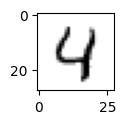

predicted as 4


In [31]:
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(test_x[i], cmap=plt.cm.binary)
  plt.show()
  print("predicted as", predicted[i])


# 컬러 이미지 분류

입력 : 10개 카테고리에 대상의 컬러 영상에 해당하는 가로 32, 세로 32, 깊이 3(R,G,B)의 3차원 행렬 숫자

출력 : 0~9의 10개 카테고리 인덱스

In [32]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

170498071/170498071 [==============================] - 3s 0us/step


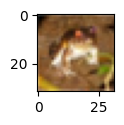

In [33]:

plt.figure(figsize=(1,1))
plt.imshow(raw_train_x[0])
plt.show()


In [34]:
print(raw_train_x[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [35]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape


model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Epoch 1/5
391/391 [==============================] - 80s 202ms/step - loss: 2.0121 - accuracy: 0.2562
Epoch 2/5
391/391 [==============================] - 73s 187ms/step - loss: 1.4446 - accuracy: 0.4771
Epoch 3/5
391/391 [==============================] - 75s 192ms/step - loss: 1.2688 - accuracy: 0.5417
Epoch 4/5
391/391 [==============================] - 73s 188ms/step - loss: 1.1807 - accuracy: 0.5747
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.1642 - accuracy: 0.5817
loss= 1.1642119884490967
acc= 0.5817000269889832
313/313 [==============================] - 5s 15ms/step
[3 8 8 ... 5 0 7]


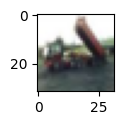

predicted as 9 truck


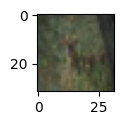

predicted as 4 deer


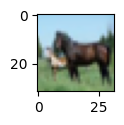

predicted as 7 horse


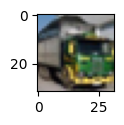

predicted as 9 truck


In [36]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  plt.figure(figsize=(1,1))
  plt.imshow(raw_train_x[i])
  plt.show()
  print("predicted as", raw_train_y[i][0], labels[raw_train_y[i][0]])

for i in [2, 10, 12, 14]:
  show_sample(i)

# 컬러 영상 회귀

입력 : 집의 컬러 영상에 해당하는 가로 256, 세로 256, 깊이 3(R,G,B)의 3차원 행렬 숫자

출력 : 0.0~1.0으로 치환된 집값

In [37]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 36.94 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (2144/2144), done.


In [38]:
import argparse
import locale
import os
import glob
import cv2


In [42]:
cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
house_info_df = pd.read_csv("Houses-dataset/Houses Dataset/HousesInfo.txt", sep=" ", header=None, names=cols)
house_info_df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226


In [43]:
print(len(house_info_df))

535


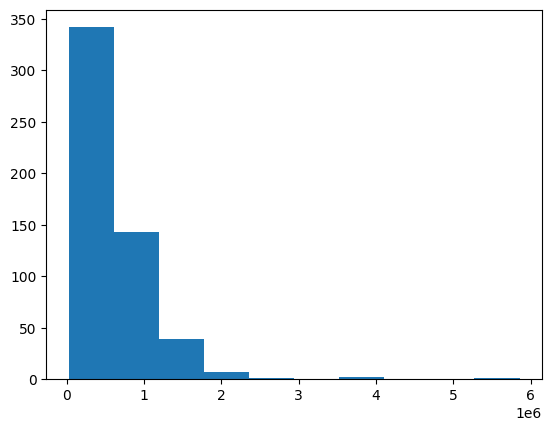

In [44]:
plt.hist(house_info_df['price'])
plt.show()

In [45]:
house_info_df['price'] = house_info_df['price'].apply(lambda x: 1000000 if x > 1000000 else x)

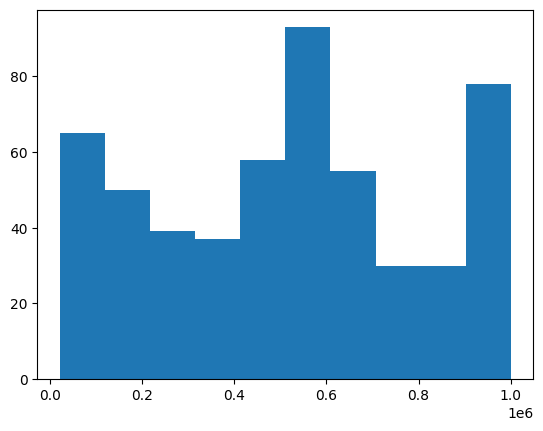

In [46]:
plt.hist(house_info_df['price'])
plt.show()

In [47]:
y = house_info_df['price'].values
y = (y - y.min()) / (y.max() - y.min())

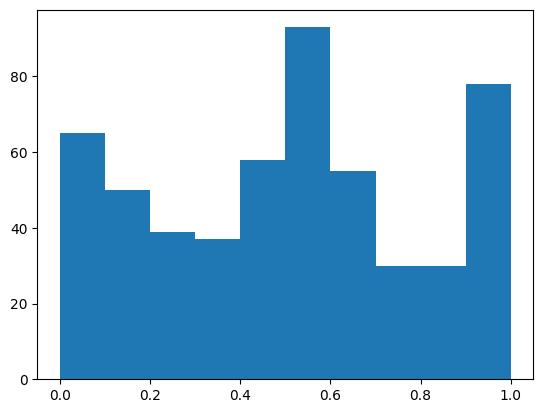

In [48]:
plt.hist(y)
plt.show()

In [49]:
def load_house_images(df, inputPath):
	images = []
	for i in df.index.values:
		basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
		housePaths = sorted(list(glob.glob(basePath)))

		inputImages = []
		outputImage = np.zeros((64*4, 64*4, 3), dtype="uint8")

		for housePath in housePaths:
			image = cv2.imread(housePath)
			image = cv2.resize(image, (32*4, 32*4))
			inputImages.append(image)

		outputImage[0:32*4, 0:32*4] = inputImages[0]
		outputImage[0:32*4, 32*4:64*4] = inputImages[1]
		outputImage[32*4:64*4, 32*4:64*4] = inputImages[2]
		outputImage[32*4:64*4, 0:32*4] = inputImages[3]
		images.append(outputImage)

	return np.array(images)

In [51]:
images = load_house_images(house_info_df, "Houses-dataset/Houses Dataset")
images = images / 255.0

print(len(images))

535


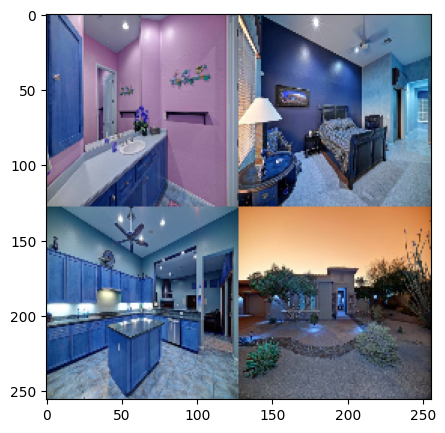

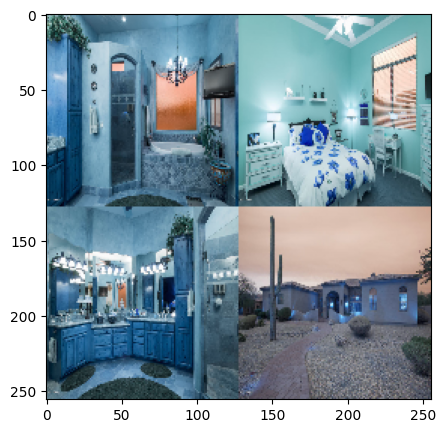

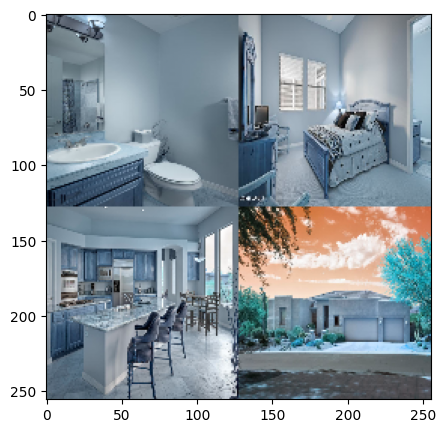

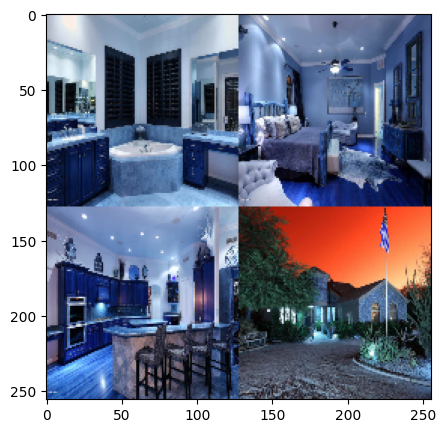

In [52]:
def show_sample(i):
  plt.figure(figsize=(5,5))
  plt.imshow(images[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [53]:
train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.25, random_state=42)

In [54]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape


model = keras.Sequential()
model.add(Input((64*4,64*4,3)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="MSE", metrics=["mse"])

model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128)


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("MSE =",mse)


Epoch 1/50
4/4 [==============================] - 51s 11s/step - loss: 0.1201 - mse: 0.1201
Epoch 2/50
4/4 [==============================] - 50s 11s/step - loss: 0.1472 - mse: 0.1472
Epoch 3/50
4/4 [==============================] - 47s 11s/step - loss: 0.0928 - mse: 0.0928
Epoch 4/50
4/4 [==============================] - 50s 11s/step - loss: 0.0929 - mse: 0.0929
Epoch 5/50
4/4 [==============================] - 47s 11s/step - loss: 0.0904 - mse: 0.0904
Epoch 6/50
4/4 [==============================] - 47s 11s/step - loss: 0.0892 - mse: 0.0892
Epoch 7/50
4/4 [==============================] - 52s 12s/step - loss: 0.0888 - mse: 0.0888
Epoch 8/50
4/4 [==============================] - 48s 11s/step - loss: 0.0864 - mse: 0.0864
Epoch 9/50
4/4 [==============================] - 47s 11s/step - loss: 0.0868 - mse: 0.0868
Epoch 10/50
4/4 [==============================] - 48s 11s/step - loss: 0.0820 - mse: 0.0820
Epoch 11/50
4/4 [==============================] - 48s 11s/step - loss: 0.0821 

In [55]:
predicted = model.predict(test_x)

5/5 [==============================] - 6s 971ms/step


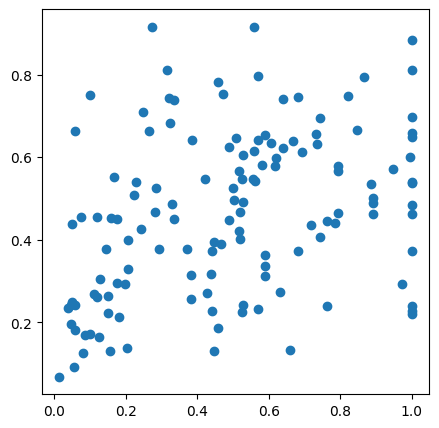

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(test_y, predicted)
plt.show()

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)       